### Display the input image and the resultant image side-by-side along with their colorbars (a strip containing k most frequently occurring colors). Give suitable explanation for the resulting colorbars.

In [81]:
%matplotlib inline

import cv2
import numpy
from matplotlib import pyplot as plt
import matplotlib as mpl
from PIL import Image
from collections import Counter

In [82]:
image = './DIP_2019_A1/q2.png'
a = 0
b = 255
k = 6

In [83]:
def linContrastStretching(img, a, b):
    img = cv2.imread(img, 0)
    
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256]) 
    
#     plt.plot(hist1) 
#     plt.show()
    
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(img)
    
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            img[i,j] = numpy.uint8(a + (b-a)*(img[i,j] - minVal)/(maxVal - minVal))
            
    res = Image.fromarray(img, 'L')
    
    hist2 = cv2.calcHist([img],[0],None,[256],[0,256])
    
#     plt.plot(hist2) 
#     plt.show()
    
    return res

In [84]:
def color(image):
#     img = cv2.imread(image)
    d = img.shape
    a = []

    for i in range(0, d[0]):
        for j in range(0, d[1]):
            a.append(tuple(numpy.array(img[i,j,:])))

    f = tuple(a)

    return f

In [85]:
i = cv2.imread(image, 0)
image1 = Image.fromarray(i, 'L')
image2 = linContrastStretching(image, 0, 255)

- Displaying the images

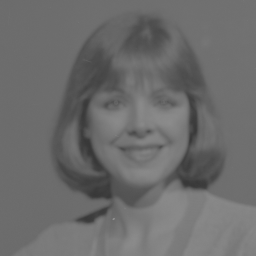

In [86]:
image1

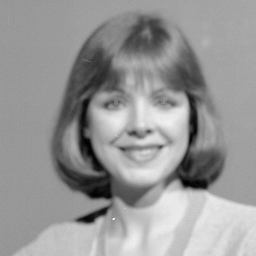

In [87]:
image2

In [88]:
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(i)

In [89]:
img = cv2.imread(image)
a1 = color(img)
a2 = color(image2)

In [90]:
d1 = Counter(a1).most_common(k)

In [91]:
d2 = Counter(a2).most_common(k)

In [92]:
colors = []

In [93]:
colors_f = []

In [94]:
for i in range(0, k):
    colors.append(numpy.float32(d1[i][0]))
    colors_f.append(numpy.float32(d2[i][0]))

In [95]:
colors = numpy.asarray(colors)

In [96]:
colors_f = numpy.asarray(colors_f)

In [97]:
for i in range(0,k):
    for j in range(0,3):
        if float(maxVal) - float(minVal) != 0:
            colors[i][j] = float((float(colors[i][j]) - float(minVal))/(maxVal - minVal))

In [98]:
for i in range(0,k):
    for j in range(0,3):
        if float(maxVal) - float(minVal) != 0:
            colors_f[i][j] = float((float(colors_f[i][j]) - float(a))/(b - a))

/Users/praffullittjain/dip/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


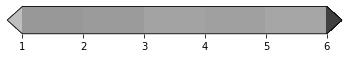

In [101]:
fig, ax = plt.subplots(figsize=(k, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(colors)
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [i for i in range(1, k+1)]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
# cb2.set_label('Discrete intervals, some other units')
fig.show()

/Users/praffullittjain/dip/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


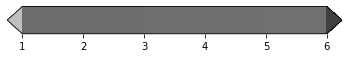

In [104]:
fig, ax = plt.subplots(figsize=(k, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(colors_f)
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [i for i in range(1, k+1)]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
# cb2.set_label('Discrete intervals, some other units')
fig.show()